In [32]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../..')
from core import colormap
from utils import showImage
from utils import channelSplit
from utils import makeLUT

### Get NIR and RED for the Image

In [2]:
img = cv2.imread('../Images/t2_noblue.jpg')
print(img.shape)
[r, _, b] = channelSplit(img)
r = np.asarray(r.T[0]).astype(float).T
b = np.asarray(b.T[0]).astype(float).T


(2464, 3277, 3)


## Find NDVI Image

In [22]:
ndvi = colormap(r, b) #b is the nir values

ret, ndvi_trunc = cv2.threshold(ndvi, 254, 255, cv2.THRESH_TOZERO)

print(np.mean(ndvi_trunc))
print(np.mean(ndvi))
print(ndvi_trunc)
#print(ndvi)

-1.01943653676 1.0
47.4689641302
109.410141827
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ..., 
 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]]


## Show Image using OpenCV

In [20]:
showImage(ndvi, 5000)
showImage(ndvi_trunc, 5000)

### Save Images

In [36]:
Image.fromarray(ndvi).save('../Images/ndvi.jpg')
Image.fromarray(ndvi_trunc).save('../Images/ndvi_trunc.jpg')

## Show Image using MatplotLib

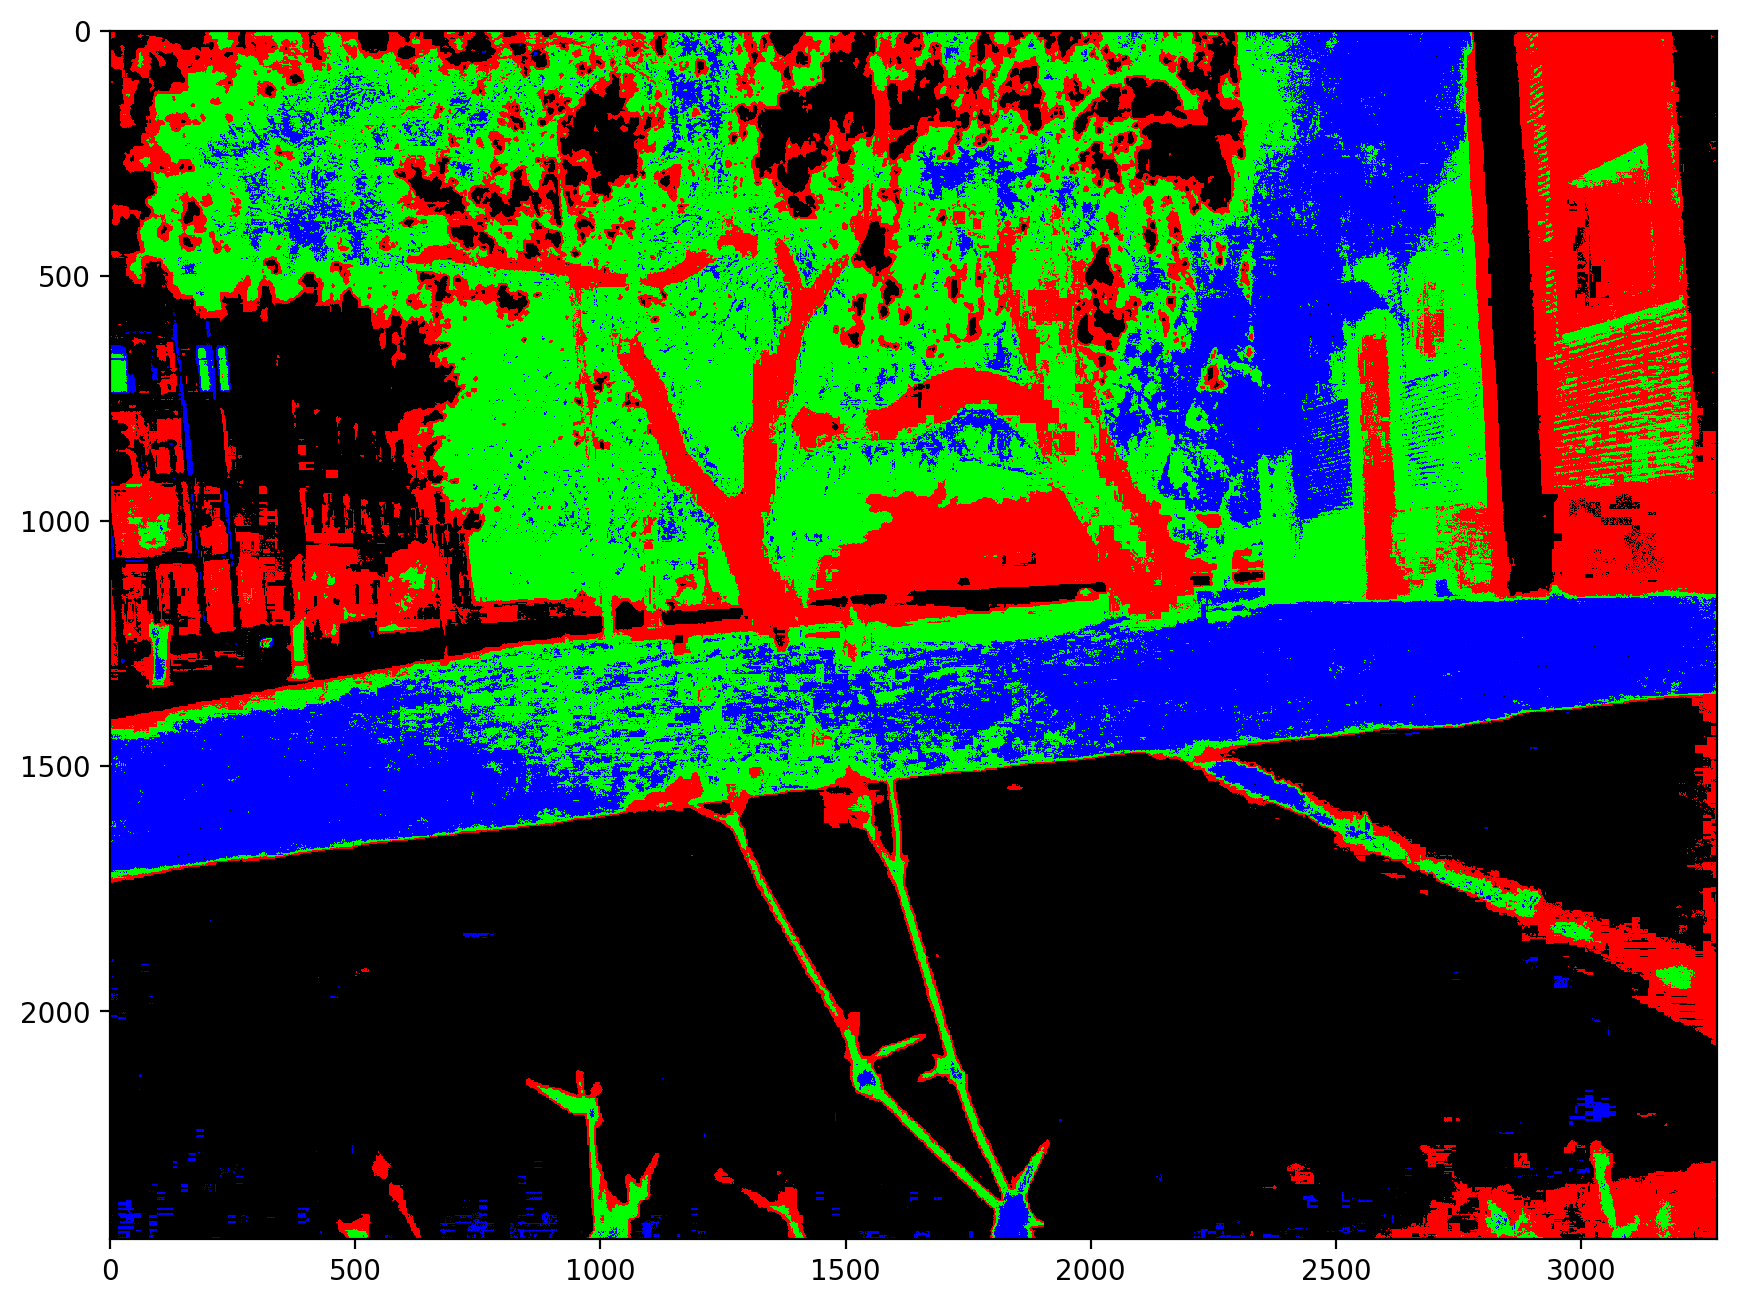

In [27]:
disp_size = disp_size = (12,8)
plt.figure(figsize=disp_size, dpi=200)
plt.imshow(ndvi_trunc, interpolation='nearest')
#plt.colorbar()
#plt.imsave('../Images/NDVI_gray_river.tiff', ndvi, cmap='plasma')

In [6]:
print(np.shape(ndvi))

(2464, 3277, 3)


In [7]:
help(cv2.LUT)

Help on built-in function LUT:

LUT(...)
    LUT(src, lut[, dst]) -> dst
    .   @brief Performs a look-up table transform of an array.
    .   
    .   The function LUT fills the output array with values from the look-up table. Indices of the entries
    .   are taken from the input array. That is, the function processes each element of src as follows:
    .   \f[\texttt{dst} (I)  \leftarrow \texttt{lut(src(I) + d)}\f]
    .   where
    .   \f[d =  \fork{0}{if \(\texttt{src}\) has depth \(\texttt{CV_8U}\)}{128}{if \(\texttt{src}\) has depth \(\texttt{CV_8S}\)}\f]
    .   @param src input array of 8-bit elements.
    .   @param lut look-up table of 256 elements; in case of multi-channel input array, the table should
    .   either have a single channel (in this case the same table is used for all channels) or the same
    .   number of channels as in the input array.
    .   @param dst output array of the same size and number of channels as src, and the same depth as lut.
    .   @sa  

In [1]:
import palettable
from matplotlib import pyplot as plt
cmap = palettable.colorbrewer.sequential.YlGn_9.mpl_colormap

newcmap = cmap.from_list('newcmap',list(map(cmap,range(50))), N=50)
for x in range(255):
    plt.bar(x,1, width=1, edgecolor='none',facecolor=newcmap(x))
plt.show()

ModuleNotFoundError: No module named 'palettable'

In [24]:
import sys
sys.path.append('../..')
from utils import makeLUT

cvals = makeLUT()
print(cvals)

NameError: name 'cVals' is not defined